# TESTING SHIT

## IMPORT STANDARD

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import config

np.random.seed(0)

## IMPORT FROM SCRIPTS

In [11]:
from implementations import *

from proj1_helpers import load_csv_data, predict_labels, create_csv_submission

## CHECK GLOBAL

In [12]:
DATA_PATH = "../data"
PREPROCESSED_PATH = DATA_PATH + "/" + "preprocessed"
SUBMISSION_PATH = "../submissions"

TRAIN_DATA_CSV_PATH = DATA_PATH + "/" + "train.csv"
TEST_DATA_CSV_PATH = DATA_PATH + "/" + "test.csv"

TRAIN_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/train.csv.zip?raw=true"
TEST_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/test.csv.zip?raw=true"

PREPROCESSED_X_NPY = "../data/preprocessed/X.npy"
PREPROCESSED_Y_NPY = "../data/preprocessed/Y.npy"
PREPROCESSED_X_te_NPY = "../data/preprocessed/X_te.npy"
PREPROCESSED_Y_te_NPY = "../data/preprocessed/Y_te.npy"
PREPROCESSED_IDS_TE_NPY = "../data/preprocessed/IDS_TE.npy"

IMPLEMENTATIONS = {
    "Least Squares Gradient Descent": least_squares_GD,
    "Least Squares Stochastic GD": least_squares_SGD,
    "Least Squares using Pseudo-Inverse": least_squares,
    "Ridge Regression": ridge_regression,
    "Logistic Regression": logistic_regression,
    "Regularized Logistic Regression": reg_logistic_regression
}

Z_VALUE = 3.0
DO_Z_OUTLIER_DETECTION = True

MAX_ITERS = 100
GAMMA = .01
LAMBDA_ = .1
K = 5
USE_OLD_DATA = False

## DOWNLOAD FILES

In [87]:
import requests 
import zipfile
    
def download_url(url, save_path, chunk_size=128):
    print("[*] Downloading from [{}]".format(url))
    r = requests.get(url, stream=True)
    with open(save_path+".zip", 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
    print("[*] Uncompressing to [{}]".format(save_path))
    with zipfile.ZipFile(save_path+".zip", 'r') as zip_ref:
        zip_ref.extractall(DATA_PATH)

if not (os.path.isdir(DATA_PATH)):
    os.mkdir(DATA_PATH)
if not (os.path.isfile(TRAIN_DATA_CSV_PATH) and os.path.isfile(TEST_DATA_CSV_PATH)):
    download_url(TRAIN_URL, TRAIN_DATA_CSV_PATH)
    download_url(TEST_URL, TEST_DATA_CSV_PATH)

## DATA EXPLORATION

In [471]:
import pandas as pd

Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

col = ["feat{}".format(indx+1) for indx in range(30)]



X_df = pd.DataFrame(X, columns=col)
X_te_df = pd.DataFrame(X_te, columns=col)
X_df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,2.859,144.665,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,-0.867,80.408,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0.811,112.718,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [541]:
Y_df = pd.DataFrame(Y)
sum(Y==1.0)/Y.shape[0]

0.342668

In [340]:
# check for each feature, how many -999 it has
for indx, col in enumerate(X_df.columns):
    print("========================================================")
    print("Feature {}: Has {} missing values ==> {}%!".format(indx+1, sum(X_df[col]==-999.), 100*sum(X_df[col]==-999.)/len(X_df)))
    print("Mean {} and Variance {}".format(np.mean(X_df[col]), np.var(X_df[col])))
    print("Number of unique Elements: {}".format(len(np.unique(X_df[col]))))
    print(np.unique(X_df[col]))

Feature 1: Has 38114 missing values ==> 15.2456%!
Mean -49.023079440000004 and Variance 165116.12412717938
Number of unique Elements: 108338
[-999.       9.044    9.222 ...  987.561  988.199 1192.026]
Feature 2: Has 0 missing values ==> 0.0%!
Mean 49.239819276 and Variance 1249.2559418725507
Number of unique Elements: 101637
[0.00000e+00 1.00000e-03 2.00000e-03 ... 5.94287e+02 5.95819e+02
 6.90075e+02]
Feature 3: Has 0 missing values ==> 0.0%!
Mean 81.181981612 and Variance 1666.975302663858
Number of unique Elements: 100558
[   6.329    6.462    7.12  ... 1153.166 1329.913 1349.351]
Feature 4: Has 0 missing values ==> 0.0%!
Mean 57.895961656 and Variance 4052.0295941117856
Number of unique Elements: 115563
[0.000000e+00 5.000000e-03 1.100000e-02 ... 7.628060e+02 1.053807e+03
 2.834999e+03]
Feature 5: Has 177457 missing values ==> 70.9828%!
Mean -708.4206753999999 and Variance 206551.75785299003
Number of unique Elements: 7087
[-9.990e+02  0.000e+00  1.000e-03 ...  8.326e+00  8.459e+00

### Observations
The following features containg missing values:
* feat1:  15%
* feat5:  70%
* feat6:  70%
* feat7:  70%
* feat13: 70%
* feat24: 40%
* feat25: 40%
* feat26: 40%
* feat27: 70%
* feat28: 70%
* feat29: 70%
    
Also:
* feat23 has takes only 4 values

In [434]:
missing_values = []
missing_values_unique = []
for indc in range(len(X_df)):
    missing_values.append([x == -999. for x in list(X_df.iloc[indc])])

In [435]:
for m in missing_values:
    if not (m in missing_values_unique):
        missing_values_unique.append([i for i, x in enumerate(m) if x])

In [472]:
np.unique(missing_values_unique)

/home/dcelik/.virtualenvs/ml/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


array([list([]), list([0]),
       list([0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]),
       list([0, 4, 5, 6, 12, 26, 27, 28]),
       list([4, 5, 6, 12, 23, 24, 25, 26, 27, 28]),
       list([4, 5, 6, 12, 26, 27, 28])], dtype=object)

### Observation:
We basically have 6 groups of data in respect to missing values
* Group 1: Have no missing values
* Group 2: Missing features: [1]
* Group 4: Missing features: [5,6,7,13,27,28,29]
* Group 5: Missing features: [1,5,6,7,13,27,28,29]
* Group 6: Missing features: [5,6,7,13,24,25,26,27,28,29] 
* Group 7: Missing features: [1,5,6,7,13,24,25,26,27,28,29] 

[  9.878  11.16   13.927 ... 980.192 985.102 988.199]
[0.00000e+00 2.00000e-03 3.00000e-03 ... 3.88979e+02 4.17028e+02
 5.94287e+02]
[  7.33    9.463  10.342 ... 733.658 734.995 789.538]
[1.200000e-01 1.930000e-01 2.930000e-01 ... 7.342770e+02 7.628060e+02
 1.053807e+03]
[0.000e+00 1.000e-03 2.000e-03 ... 8.326e+00 8.459e+00 8.503e+00]
[  13.602   14.992   15.319 ... 4160.527 4543.913 4974.979]
[-18.066 -17.842 -17.27  ...  15.79   16.219  16.648]
[0.228 0.256 0.267 ... 5.486 5.505 5.579]
[4.00000e-03 1.40000e-02 1.50000e-02 ... 3.33579e+02 3.72721e+02
 4.66525e+02]
[ 110.601  111.238  111.483 ... 1687.087 1703.752 1852.462]
[ 0.047  0.074  0.077 ... 18.872 18.992 19.773]
[-1.414 -1.413 -1.412 ...  1.412  1.413  1.414]
[0.    0.001 0.002 ... 0.998 0.999 1.   ]
[ 20.     20.001  20.002 ... 415.985 449.648 622.862]
[-2.496 -2.495 -2.494 ...  2.489  2.491  2.497]
[-3.141 -3.14  -3.139 ...  3.14   3.141  3.142]
[ 26.001  26.002  26.003 ... 437.707 447.878 461.896]
[-2.487 -2.485 -2.48  ...

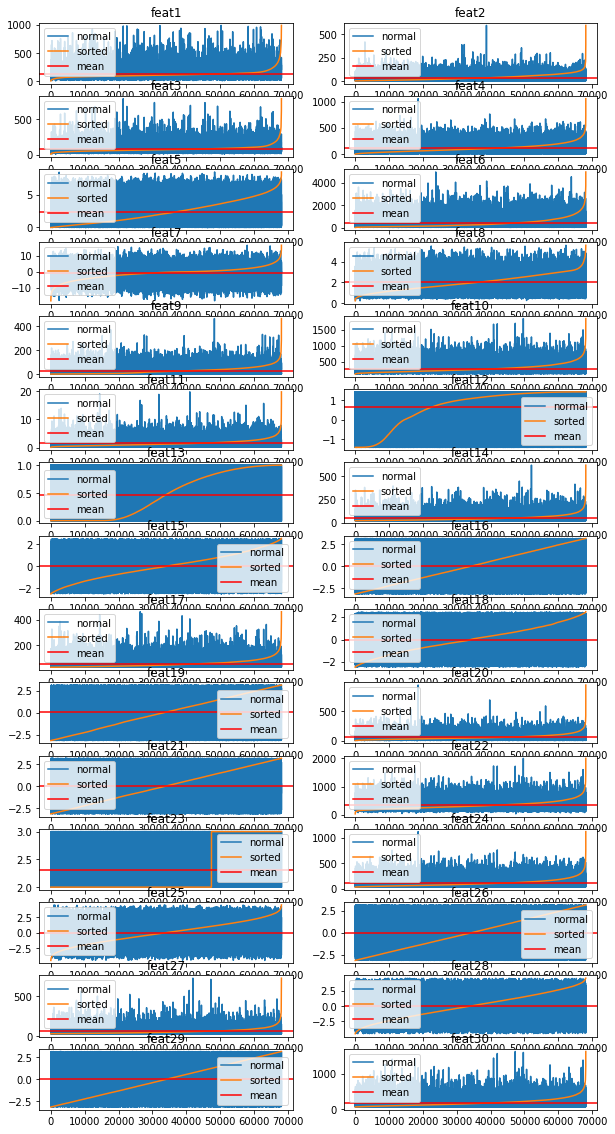

In [304]:
# NOT CORRECT I THINK
# For now, let us take a close clook at the features, while leaving out the 
# rows containing missing data
X_g = X_df[X_df != -999.].dropna(axis=0).reset_index(drop=True)

means = []
variances = []
fig, ax = plt.subplots(15, 2, figsize=(10,20))
for indx, col in enumerate(X_g.columns):
    #print("Feature {}: Has {} missing values ==> {}%!".format(indx+1, sum(X_g[col]==-999.), 100*sum(X_g[col]==-999.)/len(X_g)))
    #print("Mean {} and Variance {}".format(np.mean(X_g[col]), np.var(X_g[col])))
    ax[int(indx/2), indx%2].plot(X_g[col], label="normal")
    ax[int(indx/2), indx%2].plot(sorted(X_g[col]), label="sorted")
    ax[int(indx/2), indx%2].set_title(col)
    ax[int(indx/2), indx%2].axhline(np.mean(X_g[col]), color="red", label="mean")
    ax[int(indx/2), indx%2].legend()

## PREPROCESSING

In [335]:
if (os.path.isdir(PREPROCESSED_PATH) and USE_OLD_DATA):
    print("[*] Using previously preprocessed Data")
    X = np.load(PREPROCESSED_X_NPY)
    X_te = np.load(config.PREPROCESSED_X_TE_NPY)
    Y = np.load(PREPROCESSED_Y_NPY)
    Y_te = np.load(config.PREPROCESSED_Y_TE_NPY)
    ids_te = np.load(PREPROCESSED_IDS_TE_NPY)

else:
    print("[*] Creating preprocessed Data")
    
    if not (os.path.isdir(PREPROCESSED_PATH)):
        os.mkdir(PREPROCESSED_PATH)
    
    # load data from csv files
    Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
    Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)
    
    # split data into 3 groups, in respect to missing values
    X1 = X[X[:,5] != -999.]
    X2 = X[np.logical_and((X[:,5] == -999.), (X[:,24] != -999.))]
    X3 = X[np.logical_and((X[:,5] == -999.), (X[:,24] == -999.))]
    
    groups = [X1, X2, X3]
    
    print(X1.shape)
    print(X2.shape)
    print(X3.shape)
    
    """
    # perform preprocessing TODO seems to make it worse
    if DO_Z_OUTLIER_DETECTION:
        X = z_score_outlier_detection(X, thresh=Z_VALUE)
        X_te = z_score_outlier_detection(X_te, thresh=Z_VALUE)

    # Augment feature vector
    X = augment_features_polynomial(X, M=4)
    X_te = augment_features_polynomial(X_te, M=4)

    # standardize features
    X = standardize(X)
    X_te = standardize(X_te)

    # add ones
    X = add_ones_column(X)
    X_te = add_ones_column(X_te)

    np.save(PREPROCESSED_X_NPY, X, allow_pickle=True)
    np.save(PREPROCESSED_X_TE_NPY, X_te, allow_pickle=True)
    np.save(PREPROCESSED_Y_NPY, Y, allow_pickle=True)
    np.save(PREPROCESSED_Y_NPY, Y_te, allow_pickle=True)
    np.save(PREPROCESSED_IDS_TE_NPY, ids_te, allow_pickle=True)
    print("[*] Saved Preprocessed Data")
    """


[*] Creating preprocessed Data
(72543, 30)
(77544, 30)
(99913, 30)


In [520]:
import numpy as np
import os
from proj1_helpers import load_csv_data
from preprocessing import standardize, add_bias

DATA_PATH = "../data"
PREPROCESSED_PATH = DATA_PATH + "/" + "preprocessed"
SUBMISSION_PATH = "../submissions"

TRAIN_DATA_CSV_PATH = DATA_PATH + "/" + "train.csv"
TEST_DATA_CSV_PATH = DATA_PATH + "/" + "test.csv"

TRAIN_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/train.csv.zip?raw=true"
TEST_URL = "https://github.com/epfml/ML_course/blob/master/projects/project1/data/test.csv.zip?raw=true"

PREPROCESSED_X_TR_GROUPS_NPY = "../data/preprocessed/X_tr.npy"
PREPROCESSED_Y_TR_GROUPS_NPY = "../data/preprocessed/Y_tr.npy"
PREPROCESSED_GROUP_INDX_TR_NPY = "../data/preprocessed/group_indx_tr.npy"
PREPROCESSED_X_TE_GROUPS_NPY = "../data/preprocessed/X_te.npy"
PREPROCESSED_Y_TE_GROUPS_NPY = "../data/preprocessed/Y_te.npy"
PREPROCESSED_IDS_TE_GROUPS_NPY = "../data/preprocessed/ids_te.npy"
PREPROCESSED_GROUP_INDX_TE_NPY = "../data/preprocessed/group_indx_te.npy"

def remove_redundant(X):
    print("EXECUTE")
    non_redundant_indc = []
    for col in range(X.shape[1]):
        if np.var(X[:,col]) != 0:
            non_redundant_indc.append(col)
        else:
            print("FOUND REDUNDANT", col)
    return X[non_redundant_indc]



def split_groups(Y, X, group_col_list = [list(range(30)),
                    [k for k in range(30) if k not in [0]],
                    [k for k in range(30) if k not in [4, 5, 6, 12, 26, 27, 28]],
                    [k for k in range(30) if k not in [0, 4, 5, 6, 12, 26, 27, 28]],
                    [k for k in range(30) if k not in [4, 5, 6, 12, 23, 24, 25, 26, 27, 28]],
                    [k for k in range(30) if k not in [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]]]):

    G1 = np.logical_and((X[:,0] != -999.), (X[:,4] != -999.))
    G2 = np.logical_and((X[:,0] == -999.), (X[:,4] != -999.))
    G3 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] != -999.)), (X[:,0] != -999.))
    G4 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] != -999.)), (X[:,0] == -999.))
    G5 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] == -999.)), (X[:,0] != -999.))
    G6 = np.logical_and(np.logical_and((X[:,4] == -999.), (X[:,23] == -999.)), (X[:,0] == -999.))

    group_row_list = [G1, G2, G3, G4, G5, G6]

    groups_Y = [Y[indc] for indc in group_row_list]
    groups_X = [remove_redundant(X[indc][:,group_col_list[group]]) for group, indc in enumerate(group_row_list)]

    return groups_Y, groups_X, group_row_list
    return groups_Y, groups_X, group_row_list
save_preprocessed=True 
z_outlier=False

In [506]:
print("[*] Creating preprocessed Data")

if not (os.path.isdir(PREPROCESSED_PATH)):
    os.mkdir(PREPROCESSED_PATH)

# load data from csv files
Y_tr, X_tr, ids_tr = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

groups_tr_Y, groups_tr_X, indc_list_tr = split_groups(Y_tr, X_tr)
groups_te_Y, groups_te_X, indc_list_te = split_groups(Y_te, X_te)

[*] Creating preprocessed Data


In [507]:
X1, X2, X3, X4, X5, X6 = groups_tr_X
X11 = pd.DataFrame(X1)
X22 = pd.DataFrame(X2)
X33 = pd.DataFrame(X3)
X44 = pd.DataFrame(X4)
X55 = pd.DataFrame(X5)
X66 = pd.DataFrame(X6)

In [518]:


# load data from csv files
Y_tr, X_tr, ids_tr = load_csv_data(config.TRAIN_DATA_CSV_PN, D = X.shape)

    # find all classes and their absolute frequency
    abs_freq = {class:sum(Y==class) for class in np.unique(Y)}
    # identify values
    over_represented = max(abs_freq, key=abs_freq.get)
    under_represented = min(abs_freq, key=abs_freq.get)
    under_represented_matrix = X[Y==under_represented]
    # calculate their ratio
    ratio = over_represented/under_represented
    # calculate the amount of added samples
    added_samples = int(under_represented*ratio)
    X_new = np.zeros((N+added_samples, D))
    Y_new = np.zeros(N)

    # copy the existing data points
    X_new[:N] = X
    Y_new[:N] = Y

    # create distance matrix
    dist = np.zeros((under_represented_matrix.shape[0], under_represented_matrix.shape[0]))

    print("Calculating Distance Matrix")
    for indx1, row1 in enumerate(under_represented_matrix):
        for indx2, row2 in enumerate(under_represented_matrix):
            dist[indx1, indx2] = = numpy.linalg.norm(row1 - row2)
    # set diagonal too inf since it is out of the question
    np.fill_diagonal(dist, math.inf)
    # get K closest neighbours for each sample
    closest_neighbors = np.zeros((under_represented_matrix.shape[0], k))
    for indx in range(under_represented_matrix.shape[0]):
        closest_neighbors[indx] = np.argpartition(dist, k)
ATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

groups_tr_Y, groups_tr_X, indc_list_tr = split_groups(Y_tr, X_tr)
groups_te_Y, groups_te_X, indc_list_te = split_groups(Y_te, X_te)

EXECUTE
EXECUTE
EXECUTE
FOUND REDUNDANT 18
EXECUTE
FOUND REDUNDANT 17
EXECUTE
FOUND REDUNDANT 18
FOUND REDUNDANT 19
EXECUTE
FOUND REDUNDANT 17
FOUND REDUNDANT 18
EXECUTE
EXECUTE
EXECUTE
FOUND REDUNDANT 18
EXECUTE
FOUND REDUNDANT 17
EXECUTE
FOUND REDUNDANT 18
FOUND REDUNDANT 19
EXECUTE
FOUND REDUNDANT 17
FOUND REDUNDANT 18


In [525]:
XX = groups_tr_X[2]
XXX = pd.DataFrame(XX)

In [531]:
print("EXECUTE")
non_redundant_indc = []
for col in range(XX.shape[1]):
    if not np.var(XX[:,col]) == 0:
        non_redundant_indc.append(col)
    else:
        print("FOUND REDUNDANT", col)
X[non_redundant_indc]

EXECUTE
FOUND REDUNDANT 18


array([[ 1.38470e+02,  5.16550e+01,  9.78270e+01,  2.79800e+01,
         9.10000e-01,  1.24711e+02,  2.66600e+00,  3.06400e+00,
         4.19280e+01,  1.97760e+02,  1.58200e+00,  1.39600e+00,
         2.00000e-01,  3.26380e+01,  1.01700e+00,  3.81000e-01,
         5.16260e+01,  2.27300e+00, -2.41400e+00,  1.68240e+01,
        -2.77000e-01,  2.58733e+02,  2.00000e+00,  6.74350e+01,
         2.15000e+00,  4.44000e-01,  4.60620e+01,  1.24000e+00,
        -2.47500e+00,  1.13497e+02],
       [ 1.60937e+02,  6.87680e+01,  1.03235e+02,  4.81460e+01,
        -9.99000e+02, -9.99000e+02, -9.99000e+02,  3.47300e+00,
         2.07800e+00,  1.25157e+02,  8.79000e-01,  1.41400e+00,
        -9.99000e+02,  4.20140e+01,  2.03900e+00, -3.01100e+00,
         3.69180e+01,  5.01000e-01,  1.03000e-01,  4.47040e+01,
        -1.91600e+00,  1.64546e+02,  1.00000e+00,  4.62260e+01,
         7.25000e-01,  1.15800e+00, -9.99000e+02, -9.99000e+02,
        -9.99000e+02,  4.62260e+01],
       [-9.99000e+02,  1.62172

In [532]:
import datetime

In [533]:
datetime.datetime.now().strftime("%m_%d_%Y-%H_%M")

'10_11_2020-23_55'

In [2]:
import numpy as np
X = np.random.rand(1000, 1000)
x1, x2 = np.triu_indices(X.shape[1], 1)

In [3]:
d = np.abs(X[:, x1] - X[:, x2])

In [6]:
tpos = np.argpartition(d, 5)[:, :5]

In [8]:
tpos.shape

(1000, 5)

In [13]:
import pandas as pd

Y, X, ids = load_csv_data(TRAIN_DATA_CSV_PATH)
Y_te, X_te, ids_te = load_csv_data(TEST_DATA_CSV_PATH)

In [15]:
X = X[:100]
Y = Y[:100]

In [16]:
N, D = X.shape

# find all classes and their abosulte frequency
abs_freq = {c:sum(Y==c) for c in np.unique(Y)}
# identify values
over_represented = max(abs_freq, key=abs_freq.get)
under_represented = min(abs_freq, key=abs_freq.get)
under_represented_matrix = X[Y==under_represented]

# calculate their ratio
ratio = abs_freq[over_represented]/abs_freq[under_represented]

# calculate the amount of added samples
added_samples = int(abs_freq[under_represented]*(ratio-1))
X_new = np.zeros((N+added_samples, D))
Y_new = np.zeros(N+added_samples)

# copy the existing data points
X_new[:N] = X
Y_new[:N] = Y


In [21]:

# create distance matrix
dist = np.zeros((under_represented_matrix.shape[0], under_represented_matrix.shape[0]))


In [79]:
import math
k = 5
print("Calculating Distance Matrix")
for indx1, row1 in enumerate(under_represented_matrix):
    for indx2, row2 in enumerate(under_represented_matrix):
        dist[indx1, indx2] = np.linalg.norm(row1 - row2)
print("Finished")
# get K closest neighbours for each sample
closest_neighbors = np.zeros((under_represented_matrix.shape[0], k))
for indx in range(under_represented_matrix.shape[0]):
    closest_neighbors[indx] = np.argsort(dist[indx], 0)[:k]

# now generate new samples
for indx in range(added_samples):
    random_indx = np.random.randint(under_represented_matrix.shape[0])
    linear_combination_weights = np.random.dirichlet(np.ones(k),size=1)[0]
    X_new[N+indx] = np.sum([v*w for v,w in zip(under_represented_matrix[closest_neighbors[random_indx].astype(int)], linear_combination_weights)], axis=0)
# set labels in Y
Y_new[N:] = under_represented

Calculating Distance Matrix
Finished


In [80]:
X_new

array([[ 1.38470000e+02,  5.16550000e+01,  9.78270000e+01, ...,
         1.24000000e+00, -2.47500000e+00,  1.13497000e+02],
       [ 1.60937000e+02,  6.87680000e+01,  1.03235000e+02, ...,
        -9.99000000e+02, -9.99000000e+02,  4.62260000e+01],
       [-9.99000000e+02,  1.62172000e+02,  1.25953000e+02, ...,
        -9.99000000e+02, -9.99000000e+02,  4.42510000e+01],
       ...,
       [ 1.38696051e+02,  1.73163616e+01,  9.47752980e+01, ...,
        -1.50022103e-01, -1.53482518e+00,  2.62381962e+02],
       [ 1.15207509e+02,  3.53421450e+01,  7.80218661e+01, ...,
        -1.23331823e+00, -5.29012441e-01,  1.93806803e+02],
       [ 1.35454235e+02,  4.89571400e+01,  8.00380947e+01, ...,
        -9.99000000e+02, -9.99000000e+02,  5.34632864e+01]])

In [49]:
k  = np.argsort(dist[indx], 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [48]:
k

array([15,  1, 24, 21, 26, 35, 17, 32, 18, 14, 22, 10,  6, 11,  8, 33, 30,
        9, 31,  2,  7,  3, 12,  5, 23, 29, 19, 13,  4, 28, 34, 25, 16, 20,
       27,  0])